In [55]:
import numpy as np
import matplotlib.pyplot as plt
import cv2
import math

In [56]:
def bin(image2):
    # Dice cual es el rango de valores
    plana=[x for y in image2 for x in y]
    #print(f"el valor máximo es: {max(plana)} y el mínimo es: {min(plana)}")

    # Modificando "rango" modificas el umbral
    rango = -3
    umbral = ((min(plana) + max(plana))/2) + rango
    # print(umbral)

    # Binarizacion
    _, imgBin = cv2.threshold(image2, umbral, 255, cv2.THRESH_BINARY)

    return imgBin

In [57]:
def p1(test):
    forma2 = np.shape(test)
    base2 = np.zeros(forma2)
    base3 = np.zeros(forma2)

    alto, ancho = forma2

    # Primer valor
    grupo = 1

    # Llenado de valores
    for y2 in range(alto):
        for x2 in range(ancho):
            
            if test[y2,x2] == 255: # Si el valor en la matriz es 255 (blanco)
                
                if base2[y2,x2-1] != 0: # Si el valor a la izquierda es diferente de 0, toma ese valor
                    base2[y2,x2] = base2[y2,x2-1]
                    #print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
                
                if base2[y2-1,x2] != 0: # Si el valor arriba es diferente de 0, toma ese valor
                    base2[y2,x2] = base2[y2-1,x2]
                    #print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
                
                # Si los valores tanto arriba como a la izquierda son diferentes de 0, elige el menor
                if (base2[y2,x2-1] != 0) and (base2[y2-1,x2] != 0):
                    
                    if(base2[y2,x2-1] < base2[y2-1,x2]): # Si el valor a la izquierda es menor, toma ese valor
                        base2[y2,x2] = base2[y2,x2-1]
                        #print("Padre: [",y2,"]","[",x2-1,"]  Valor:(",base2[y2,x2-1],") --> Hijo:[",y2,"]","[",x2,"]")
                    
                    else: # Caso opuesto (entonces el de arriba es menor)
                        base2[y2,x2] = base2[y2-1,x2]
                        #print("Padre: [",y2-1,"]","[",x2,"]  Valor:(",base2[y2-1,x2],") --> Hijo:[",y2,"]","[",x2,"]")
                
                # Si el valor es 0 (y no tiene vecinos, porque primero se ve si tiene vecinos (codigo de arriba)) entonces asigna el valor de grupo nuevo
                if base2[y2,x2] == 0:
                    base2[y2,x2] = grupo
                    grupo = grupo+1
    return base2

In [58]:
def p2(base2):
    base3 = base2
    
    forma2 = np.shape(base2)
    alto, ancho = forma2
    
    for y2 in range(alto):
        for x2 in range(ancho):
            
            lista = []
            
            if base3[y2,x2] != 0:
                
                lista.append(base3[y2,x2])                
                    
                if(y2>0) and (base3[y2-1][x2] != 0):
                    #[^] Vecino de arriba:
                    lista.append(base3[y2-1][x2])
                    
                if(x2<(ancho-1)) and (base3[y2][x2+1] != 0):
                    #[->] Vecino de la derecha
                    lista.append(base3[y2][x2+1])
                
                if(y2<(alto-1)) and (base3[y2+1][x2] != 0):
                    #[v] Vecino de abajo
                    lista.append(base3[y2+1][x2])
                    
                if(x2>0) and (base3[y2][x2-1] != 0):
                    #[<-] Vecino de la izquierda
                    lista.append(base3[y2][x2-1])

                #print("[",y2,"]","[",x2,"]",lista)
                
                #print("min ",min(lista))
                
                base3[y2,x2] = min(lista)
    return plt.imshow(base3, cmap="rainbow")

In [60]:
def componentes(yeah):
    return p2(p1(bin(yeah)))

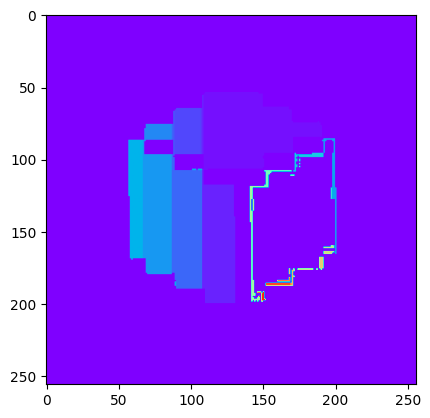

In [61]:
hola = cv2.imread('../../IMAGES/chiquita.jpg', 0)

componentes(hola)